In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/quantai/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_escalado = scaler.fit_transform(df)
df_escalado = pd.DataFrame(df_escalado, columns=df.columns)
df_escalado.head()

,age,is_male,engine_size,months_last_claim,fraud
0,0.743243,0.0,0.384615,1.000000,1.0
1,0.324324,0.0,0.000000,0.333333,1.0
2,0.837838,0.0,1.000000,0.333333,0.0
3,0.202703,1.0,0.384615,0.000000,1.0
4,0.216216,1.0,0.384615,0.333333,0.0


In [6]:
df.columns

Index(['age', 'is_male', 'engine_size', 'months_last_claim', 'fraud'], dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_escalado[['age', 
                                                                 'is_male', 
                                                                 'engine_size', 
                                                                 'months_last_claim']],
                                                    df_escalado['fraud'] ,test_size=0.2)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
32,0.864865,1.0,1.000000,1.0
42,0.918919,0.0,0.384615,0.0
95,0.743243,1.0,1.000000,1.0


In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
train_accuracy

0.775

In [28]:
preds = knn.predict(X_test)
preds

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0.])

In [29]:
from sklearn.metrics import accuracy_score
acc_teste = accuracy_score(y_test, preds)
acc_teste

0.65

In [31]:
for k in range(3, 20, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    preds = knn.predict(X_test)
    acc_teste = accuracy_score(y_test, preds)
    print(k, acc_train, acc_teste)

3 0.775 0.65
4 0.6375 0.4
5 0.6375 0.4
6 0.65 0.55
7 0.65 0.55
8 0.6625 0.55
9 0.6125 0.55
10 0.625 0.6
11 0.6375 0.45
12 0.6625 0.55
13 0.625 0.45
14 0.6125 0.45
15 0.6625 0.45
16 0.6625 0.5
17 0.65 0.35
18 0.6625 0.45
19 0.6625 0.5


In [32]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

[[8 4]
 [6 2]]


<Axes: >

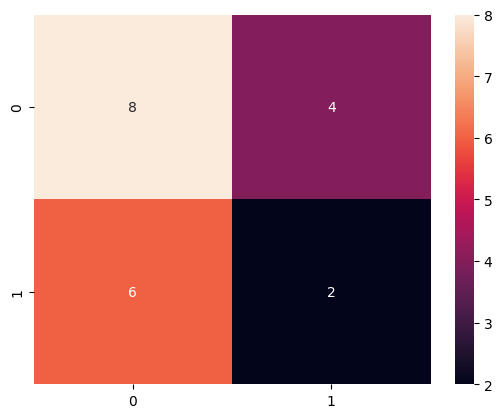

In [33]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.57      0.67      0.62        12
         1.0       0.33      0.25      0.29         8

    accuracy                           0.50        20
   macro avg       0.45      0.46      0.45        20
weighted avg       0.48      0.50      0.48        20



# SVM

In [40]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
acc_treino = svm.score(X_train, y_train)
print("acc_treino:", acc_treino)

preds = svm.predict(X_test)
print(preds)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 0.675
[1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.]
acc_teste: 0.5


# Exercicio Individual

In [42]:
df_treino = pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20okk.csv")
df_test   = pd.read_csv("https://raw.githubusercontent.com/lcbjrrr/data/main/RiscoCredito%20-%20prever2.csv")

df_treino.head()

,Inadimplente,Genero,GrauEscolaridade,Profissao,Renda
0,1,1,4,1,1.4
1,0,2,7,9,2.6
2,0,1,7,9,5.8
3,0,1,7,9,4.7
4,0,1,7,9,3.9


In [43]:
df_treino.columns

Index(['Inadimplente', 'Genero', 'GrauEscolaridade', 'Profissao', 'Renda'], dtype='object')

In [53]:
alvo = 'Inadimplente'
variaveis = ['Genero', 'GrauEscolaridade', 'Profissao', 'Renda']

X_train = df_treino[variaveis]
y_train = df_treino[alvo]
X_test  = df_test[variaveis]
y_test  = df_test[alvo]

## KNN

In [52]:
for k in range(3, 20, 1):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    acc_train = knn.score(X_train, y_train)
    preds = knn.predict(X_test)
    acc_teste = accuracy_score(y_test, preds)
    print(k, acc_train, acc_teste)

3 1.0 1.0
4 1.0 1.0
5 1.0 1.0
6 1.0 1.0
7 1.0 1.0
8 1.0 1.0
9 1.0 1.0
10 1.0 1.0
11 1.0 1.0
12 1.0 1.0
13 1.0 1.0
14 1.0 1.0
15 1.0 1.0
16 1.0 1.0
17 1.0 1.0
18 1.0 1.0
19 1.0 1.0


In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
acc_train = knn.score(X_train, y_train)
print("acc_treino:", acc_train)

preds = knn.predict(X_test)
print(preds)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 1.0
[1 0 0 0 0 0 0 1]
acc_teste: 1.0


[[6 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



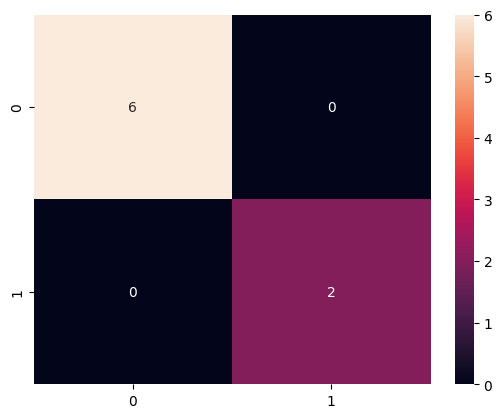

In [57]:
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))

## SVM

In [58]:
svm = SVC()
svm.fit(X_train, y_train)
acc_treino = svm.score(X_train, y_train)
print("acc_treino:", acc_treino)

preds = svm.predict(X_test)
print(preds)

acc_teste = accuracy_score(y_test, preds)
print("acc_teste:", acc_teste)

acc_treino: 1.0
[1 0 0 0 0 0 0 1]
acc_teste: 1.0


[[6 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         2

    accuracy                           1.00         8
   macro avg       1.00      1.00      1.00         8
weighted avg       1.00      1.00      1.00         8



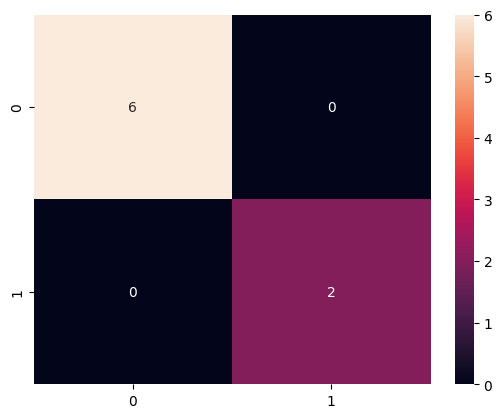

In [59]:
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")
print(classification_report(y_test, preds))